In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('outlier_data.csv')
dataset.head(5)


,Name,Age,Salary,Experience
0,Alice,25,50000,2
1,Bob,27,52000,3
2,Charlie,26,51000,2
3,David,24,49000,1
4,Eva,28,53000,3


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        20 non-null     object
 1   Age         20 non-null     int64 
 2   Salary      20 non-null     int64 
 3   Experience  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [ ]:
dataset.describe()


,Age,Salary,Experience
count,20.000000,20.000000,20.000000
mean,31.300000,91150.000000,4.200000
std,16.415974,167089.095364,6.212043
min,23.000000,47000.000000,1.000000
25%,26.000000,50000.000000,2.000000
50%,27.500000,52000.000000,3.000000
75%,29.250000,54250.000000,4.000000
max,100.000000,800000.000000,30.000000


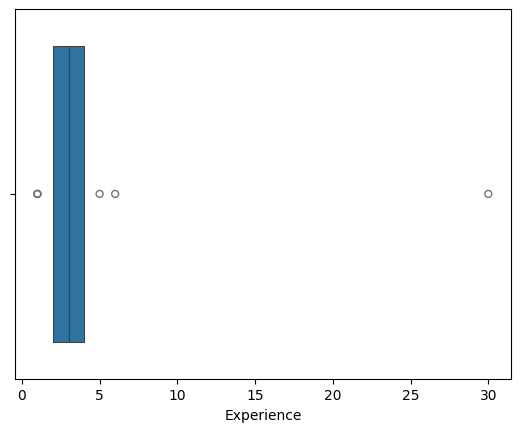

In [ ]:
sns.boxenplot(x="Experience" , data= dataset)  #detecting the outliers
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15108\305940901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Experience'])


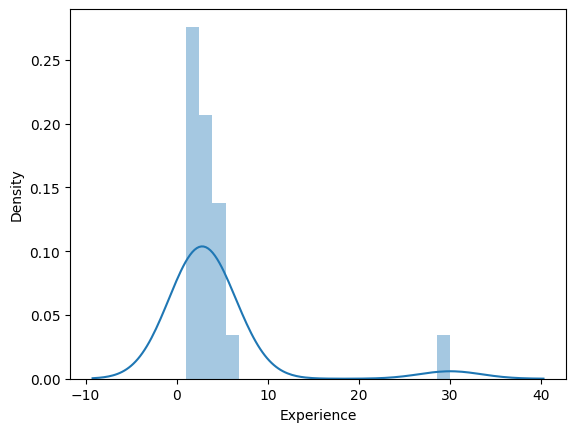

In [11]:
sns.distplot(dataset['Experience'])
plt.show()

In [ ]:
q1 = dataset['Experience'].quantile(0.25)    #using the IQR method
q3 = dataset['Experience'].quantile(0.75)
q3

np.float64(4.0)

In [15]:
IQR = q3 - q1
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
min_range , max_range 


(np.float64(-1.0), np.float64(7.0))

In [18]:
dataset.shape

(20, 4)

In [ ]:
new_dataset = dataset[dataset['Experience'] <= max_range]
new_dataset

,Name,Age,Salary,Experience
0,Alice,25,50000,2
1,Bob,27,52000,3
2,Charlie,26,51000,2
3,David,24,49000,1
4,Eva,28,53000,3
5,Frank,29,800000,4
6,Grace,30,55000,5
7,Hassan,32,54000,4
8,Isla,23,47000,1
9,Jack,100,56000,2


In [19]:
new_dataset.shape

(19, 4)

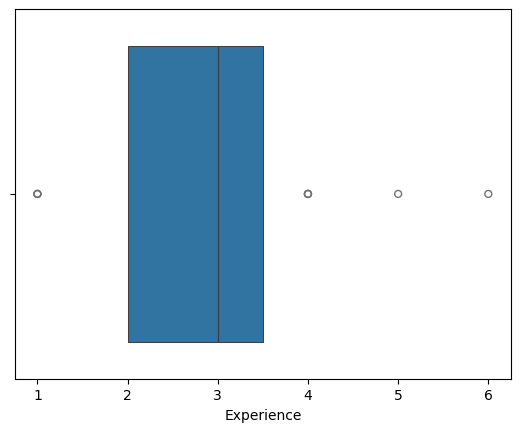

In [20]:
sns.boxenplot(x="Experience" , data= new_dataset)
plt.show()

In [ ]:
#Using Z-score method

In [23]:
min_range = dataset['Experience'].mean() - (3*dataset['Experience'].std())
max_range = dataset['Experience'].mean() + (3*dataset['Experience'].std())

In [24]:
min_range , max_range

(np.float64(-14.436127901414896), np.float64(22.836127901414894))

In [25]:
new_data = dataset[dataset['Experience'] < max_range]

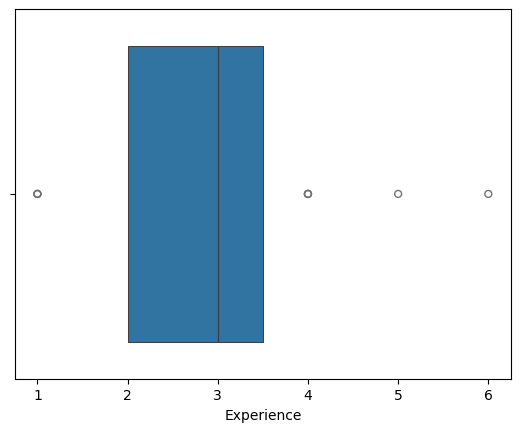

In [27]:
sns.boxenplot(x="Experience" , data= new_data)  #detecting the outliers
plt.show()